#Relatorio

## importando e instalando

In [21]:
import pandas as pd

In [22]:
import numpy as np

In [24]:
# importando o pacote matplotlib
import matplotlib.pyplot as plt
# definindo o backend do matplotlib no arquivo jupyter
%matplotlib inline

In [26]:
data = pd.read_csv(
    'Tb_trabalho.csv', sep=',', encoding='UTF-8'
    )

FileNotFoundError: ignored

In [ ]:
# instalar o gspread
!pip install gspread

In [ ]:
#autorizando google sheets
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)



In [ ]:
#importando o arquivo
pasta_trabalho =gc.open ('Tb_trabalho') #pasta_trabalho recebe o arquivo
tb_trabalho = pasta_trabalho.worksheet('Página1') #tb_trabalho recebe a pagina q esta a tabela
dados_trabalho = tb_trabalho.get_all_values()
dados_trabalho

[['Dia', 'Horas Trabalhadas', 'Bugs Corrigidos', 'Tarefas Concluídas'],
 ['Segunda', '6', '3', '5'],
 ['Terça', '7', '2', '4'],
 ['Quarta', '8', '1', '6'],
 ['Quinta', '6', '4', '4'],
 ['Sexta', '7', '3', '5'],
 ['Sábado', '5', '2', '3'],
 ['Domingo', '4', '1', '2']]

In [ ]:
dados_trabalho = tb_trabalho.get_all_records()
dados_trabalho






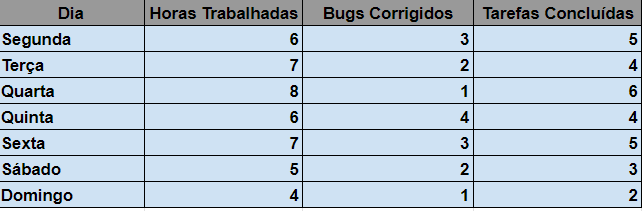


## Tabela com os dados disponibilizados pra uma análise exploratória:
- Empresa de desenvolvimento de softwares possui uma tabela com oseguintes dados para que seja criado um relatório com uma análise exploratória. Tabela abaixo em formato DataFrame.


In [ ]:
dataframe = pd.DataFrame (dados_trabalho)
dataframe

,Dia,Horas Trabalhadas,Bugs Corrigidos,Tarefas Concluídas
0,Segunda,6,3,5
1,Terça,7,2,4
2,Quarta,8,1,6
3,Quinta,6,4,4
4,Sexta,7,3,5
5,Sábado,5,2,3
6,Domingo,4,1,2


In [ ]:
#convertendo coluna 'dia' em Series, para uma mellhor manipulação
dia = pd.Series (dataframe ['Dia'])
dia

0    Segunda
1      Terça
2     Quarta
3     Quinta
4      Sexta
5     Sábado
6    Domingo
Name: Dia, dtype: object

In [ ]:
#convertendo coluna 'Horas Trabalhadas em Series
hora_trab = pd.Series (dataframe['Horas Trabalhadas'])
hora_trab


0    6
1    7
2    8
3    6
4    7
5    5
6    4
Name: Horas Trabalhadas, dtype: int64

-  Descrição estatistica de horas trabalhadas do funcionario 'fulano':

```
              - ⏰ Maximo de horas trabalhadas em um dia : 8hs
              - ⏰ Minimo de horas trabalhadas em um dia : 4hs
              - ⏰ Total de horas trabalhadas em uma semana : 43hs
              - ⏰ Total de dias contabilizados : 7 dias
              - ⏰ Media de horas trabalhadas : 6:14 hs
```


In [ ]:
# analise estatistica de horas trabalhadas
valor= hora_trab.max()
print('Máximo de horas trabalhadas em um dia: {:.2f}'.format(hora_trab.max()))
print('Mínimo de horas trabalhadas em um dia {:.2f}'.format(hora_trab.min()))
print('Total de dias contabilizados: {:.2f}'.format(hora_trab.count()))
print('Média de horas trabalhadas: {:.2f}'.format(hora_trab.mean()))
print('Total de horas trabalhadas na semana: {:.2f}'.format(hora_trab.sum()))
print('Máximo de horas trabalhadas em um dia {:.2f}'.format(valor))



Máximo de horas trabalhadas em um dia: 8.00
Mínimo de horas trabalhadas em um dia 4.00
Total de dias contabilizados: 7.00
Média de horas trabalhadas: 6.14
Total de horas trabalhadas na semana: 43.00
Máximo de horas trabalhadas em um dia 8.00


In [ ]:
hora_trab.describe()

count    7.000000
mean     6.142857
std      1.345185
min      4.000000
25%      5.500000
50%      6.000000
75%      7.000000
max      8.000000
Name: Horas Trabalhadas, dtype: float64

Text(0, 0.5, 'Horas trabalhadas por dia')

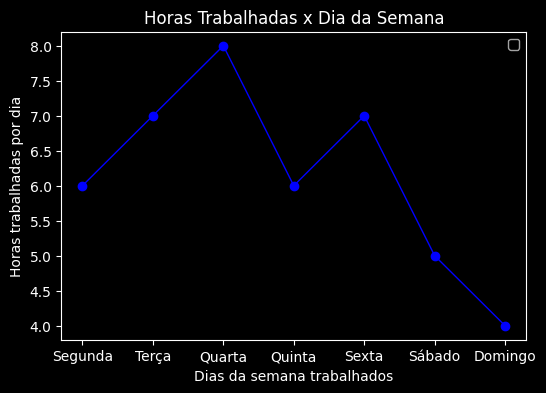

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize = (6,4))
#plt.plot(dia,hora_trab, color = 'green', label = "Linha que mostra o numero de horas trabalhada x dia") #plt.plot(x, y, color = "green")
plt.plot(dia, hora_trab, color='blue', ls='-', lw='1', marker='o')
plt.title("Horas Trabalhadas x Dia da Semana")
plt.grid(False)
plt.box(True)
plt.legend()
plt.xlabel("Dias da semana trabalhados")
plt.ylabel("Horas trabalhadas por dia")


Text(0, 0.5, 'Horas trabalhadas por dia')

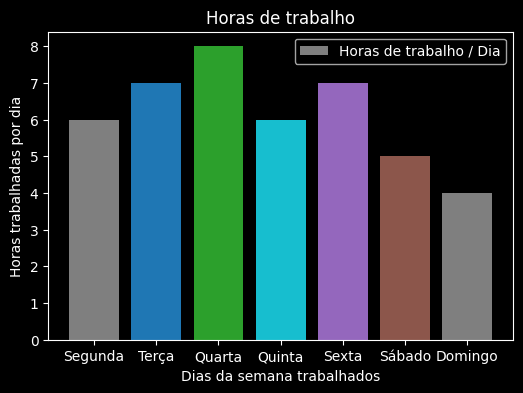

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize = (6,4))
bar_colors = ['tab:grey', 'tab:blue', 'tab:green', 'tab:cyan', 'tab:purple', 'tab:brown']
plt.bar(dia, hora_trab, color = bar_colors, label = "Horas de trabalho / Dia")
plt.grid(False)
plt.box(True)
plt.title("Horas de trabalho")
plt.legend()
plt.xlabel("Dias da semana trabalhados")
plt.ylabel("Horas trabalhadas por dia")